In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.shape, test.shape)
train.head()


(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
# Feature Engineering
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]
test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]

# Features and Target
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalSF"]
X = train[features]
y = train["SalePrice"]


In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)


R2 Score: 0.7927420210545191
MSE: 1589736307.5541596


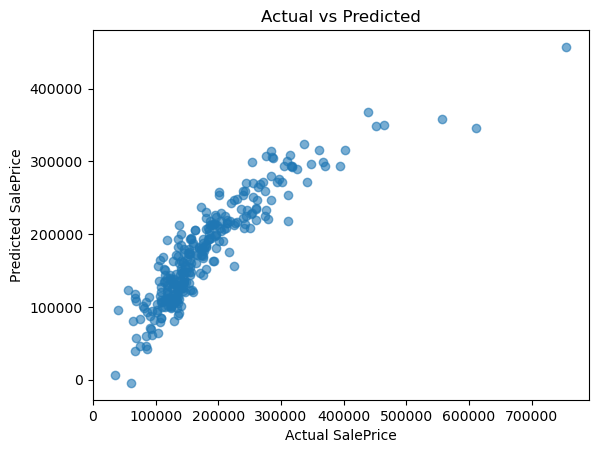

In [30]:
print("R2 Score:", r2_score(y_valid, y_pred))
print("MSE:", mean_squared_error(y_valid, y_pred))

# Plot Actual vs Predicted
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted")
plt.show()


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define pipeline: imputation + linear regression
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", LinearRegression())
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate on validation data
y_pred = pipeline.predict(X_valid)
print("R2 Score:", r2_score(y_valid, y_pred))
print("MSE:", mean_squared_error(y_valid, y_pred))

# Predict on test data (NaNs will be handled automatically)
final_predictions = pipeline.predict(test[features])

# Prepare submission
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": final_predictions
})

submission.to_csv("submission.csv", index=False)
submission.head()


R2 Score: 0.7927420210545191
MSE: 1589736307.5541594


,Id,SalePrice
0,1461,107394.328950
1,1462,162565.399386
2,1463,159896.639002
3,1464,182425.769685
4,1465,225724.853407
